
<h1 style="background-color: lightblue; color: Azure Blue; padding: 10px; border: 2px solid darkblue; text-align: center;">
    TP2 : Les réseaux sémantiques
</h1>



<h2 style="text-align: center; color: gray;">Réalisé par : EL HILALI ILHAM </h2>

## Partie 1:

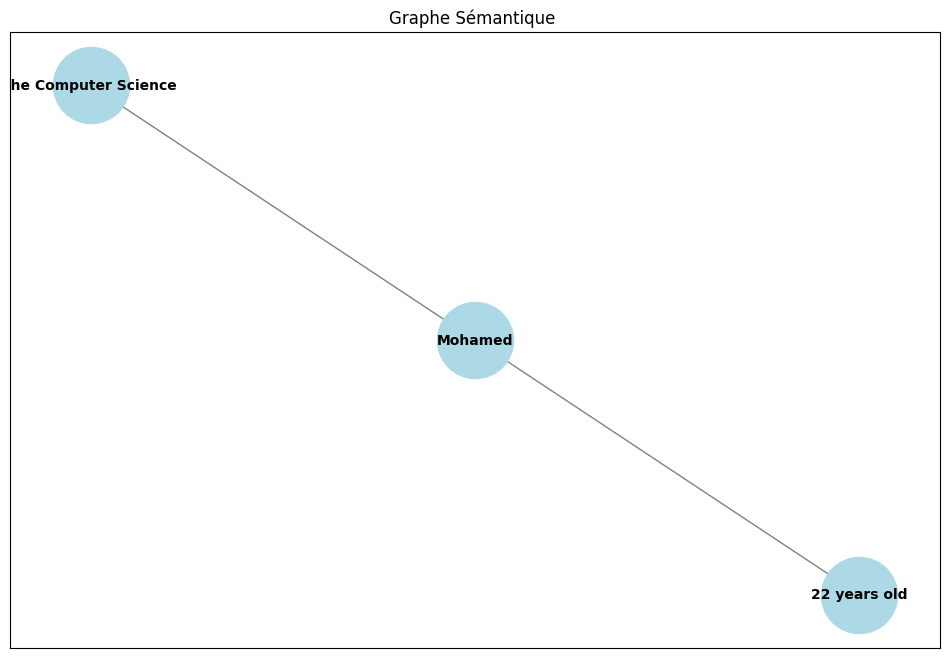

In [5]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Charger le modèle spaCy
nlp = spacy.load("en_core_web_sm")


text = """
Mohamed is a student studying in the Computer Science department.
Mohamed is 22 years old.
"""

# Appliquer spaCy au texte
doc = nlp(text)

# Extraire les entités nommées et leurs relations
entities = []
relations = []

for sentence in doc.sents:
    ents_in_sentence = [ent.text for ent in sentence.ents]
    entities.extend(ents_in_sentence)
    

    for ent1, ent2 in combinations(ents_in_sentence, 2):
        relations.append((ent1, ent2))


entities = list(set(entities))
relations = list(set(relations))

# Créer un graphe non orienté
G = nx.Graph()

# Ajouter les entités en tant que nœuds
G.add_nodes_from(entities)

# Ajouter les relations en tant qu'arêtes
G.add_edges_from(relations)

# Ajuster la disposition des nœuds
pos = nx.spring_layout(G)  

# Visualiser le graphe
plt.figure(figsize=(12, 8), facecolor='white')
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, font_size=10, node_color="lightblue", font_weight="bold", edge_color="gray")
plt.title("Graphe Sémantique ")
plt.show()


## Partie 2:

### Question 1:Utiliser un corpus plus large pour voir comment le réseau évolue

In [13]:
import spacy
import networkx as nx
import plotly.graph_objects as go
from itertools import combinations

# Charger le modèle spaCy
nlp = spacy.load("en_core_web_sm")

# 1. Utiliser un corpus plus large pour voir comment le réseau évolue

text = """
Mohamed est un étudiant qui étudie dans le département d'Informatique d'une université bien connue. Il poursuit actuellement un diplôme en Informatique, un domaine qui implique une compréhension approfondie de la programmation, des algorithmes et des structures de données. À 22 ans, Mohamed est passionné par la technologie et ses applications, en particulier dans des domaines tels que l'intelligence artificielle et le développement logiciel.

Depuis toujours, Mohamed a été attiré par la résolution de problèmes et la pensée logique, ce qui l'a conduit à choisir l'Informatique comme domaine d'études. Au fil de son parcours académique, Mohamed a acquis une expertise dans plusieurs langages de programmation, notamment Python, Java et C++.

En dehors de ses études, Mohamed participe activement à diverses compétitions de programmation et aime collaborer sur des projets open-source. Il croit fermement que l'apprentissage est un processus continu, c'est pourquoi Mohamed consacre du temps à se tenir à jour sur les dernières tendances technologiques et les avancées de l'industrie technologique.
"""

# Traiter le texte
doc = nlp(text)

### Question 2:Explorer des méthodes avancées de détection de relations, telles que les dépendances syntaxiques.

In [14]:

print("Relations de dépendances syntaxiques :")
for token in doc:
    print(f"{token.text} - {token.dep_} -> {token.head.text}")

Relations de dépendances syntaxiques :

 - dep -> Mohamed
Mohamed - nmod -> connue
est - amod -> qui
un - compound -> qui
étudiant - compound -> qui
qui - compound -> dans
étudie - compound -> dans
dans - preconj -> Mohamed
le - appos -> dans
département - prep -> le
d'Informatique - nmod -> connue
d'une - nummod -> d'Informatique
université - compound -> bien
bien - compound -> connue
connue - ROOT -> connue
. - punct -> connue
Il - nmod -> actuellement
poursuit - compound -> actuellement
actuellement - dep -> implique
un - compound -> diplôme
diplôme - dobj -> actuellement
en - prep -> diplôme
Informatique - pobj -> en
, - punct -> implique
un - compound -> qui
domaine - compound -> qui
qui - nsubj -> implique
implique - ROOT -> implique
une - compound -> compréhension
compréhension - compound -> programmation
approfondie - compound -> programmation
de - nmod -> programmation
la - compound -> programmation
programmation - dobj -> implique
, - punct -> programmation
des - nmod -> donn

### Question 3:Appliquer une mesure de similarité pour connecter les concepts liés sémantiquement mais non explicitement co-mentionnés

In [15]:
doc1 = nlp("programmation")
doc2 = nlp("développement logiciel")

# Calculer et afficher la similarité
similarity_score = doc1.similarity(doc2)
print(f"\nSimilarité entre 'programmation' et 'développement logiciel': {similarity_score}")



Similarité entre 'programmation' et 'développement logiciel': 0.40538913011550903


C:\Users\PC\AppData\Local\Temp\ipykernel_18752\3544676163.py:5: UserWarning:

[W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.



### Question 4:Créer une interface graphique qui permet de naviguer à travers le réseau sémantique et de visualiser les relations entre les concepts

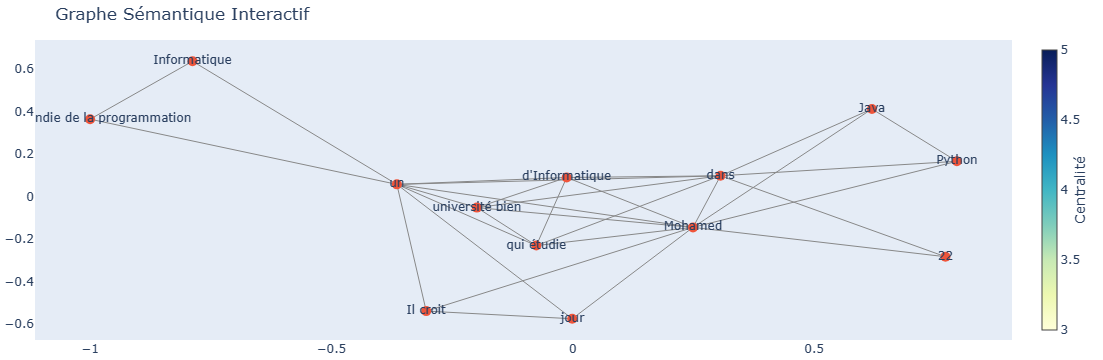

In [16]:

# Extraire les entités et les relations basées sur la co-occurrence
entities = []
relations = []

for sentence in doc.sents:
    ents_in_sentence = [ent.text for ent in sentence.ents]
    entities.extend(ents_in_sentence)
    for ent1, ent2 in combinations(ents_in_sentence, 2):
        relations.append((ent1, ent2))


entities = list(set(entities))
relations = list(set(relations))

# Créer le graphe
G = nx.Graph()
G.add_nodes_from(entities)
G.add_edges_from(relations)

# Obtenir les positions des nœuds pour la visualisation
pos = nx.spring_layout(G)

# Créer des listes pour les arêtes
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Tracer les arêtes
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Créer des listes pour les nœuds
node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

# Tracer les nœuds
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Centralité',
            xanchor='left',
            titleside='right'
        )
    )
)

# Créer la figure et l'afficher
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Graphe Sémantique Interactif',
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))
fig.show()